In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:41897 Dashboard: /proxy/41871/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_naive.db'
session = cc.database.create_session(db)

In [4]:
expt = ['025deg_jra55_ryf_nostress_naive']

In [5]:
dir_list = ['/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_naive']
cc.database.build_index(dir_list, session, update=True)

  2%|▏         | 2/108 [00:00<00:09, 11.71it/s]

Indexing experiment: 025deg_jra55_ryf_nostress_naive


100%|██████████| 108/108 [00:09<00:00, 10.98it/s]


108

In [10]:
vars_025deg = cc.querying.get_variables(session, experiment= expt)
vars_025deg[vars_025deg['name'].str.lower().str.match('net_sfc_heating')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
94,net_sfc_heating,surface ocean heat flux coming through coupler...,1 hourly,output000/ocean/ocean-2d-net_sfc_heating-1-hou...,1,1900-01-01 00:00:00,1900-01-01 06:00:00
134,net_sfc_heating,surface ocean heat flux coming through coupler...,1 monthly,output000/ocean/ocean-2d-net_sfc_heating-1-mon...,1,1900-01-01 00:00:00,1900-02-01 00:00:00


In [8]:
expt = '025deg_jra55_ryf_nostress_naive'

In [9]:
temp_sfc = cc.querying.getvar(expt = expt, session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc = cc.querying.getvar(expt = expt, session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river = cc.querying.getvar(expt = expt, session = session, variable = 'pme_river', frequency = '1 hourly')
mld = cc.querying.getvar(expt = expt, session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc = cc.querying.getvar(expt = expt, session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

In [11]:
pme_net = cc.querying.getvar(expt = expt, session = session, variable = 'pme_net', frequency = '1 hourly')
hblt = cc.querying.getvar(expt = expt, session = session, variable = 'hblt', frequency = '1 hourly')
diff_cbt = cc.querying.getvar(expt = expt, session = session, variable = 'diff_cbt_t', frequency = '1 hourly')

Text(0.5, 1.0, 'Surface temperature - 6th hour')

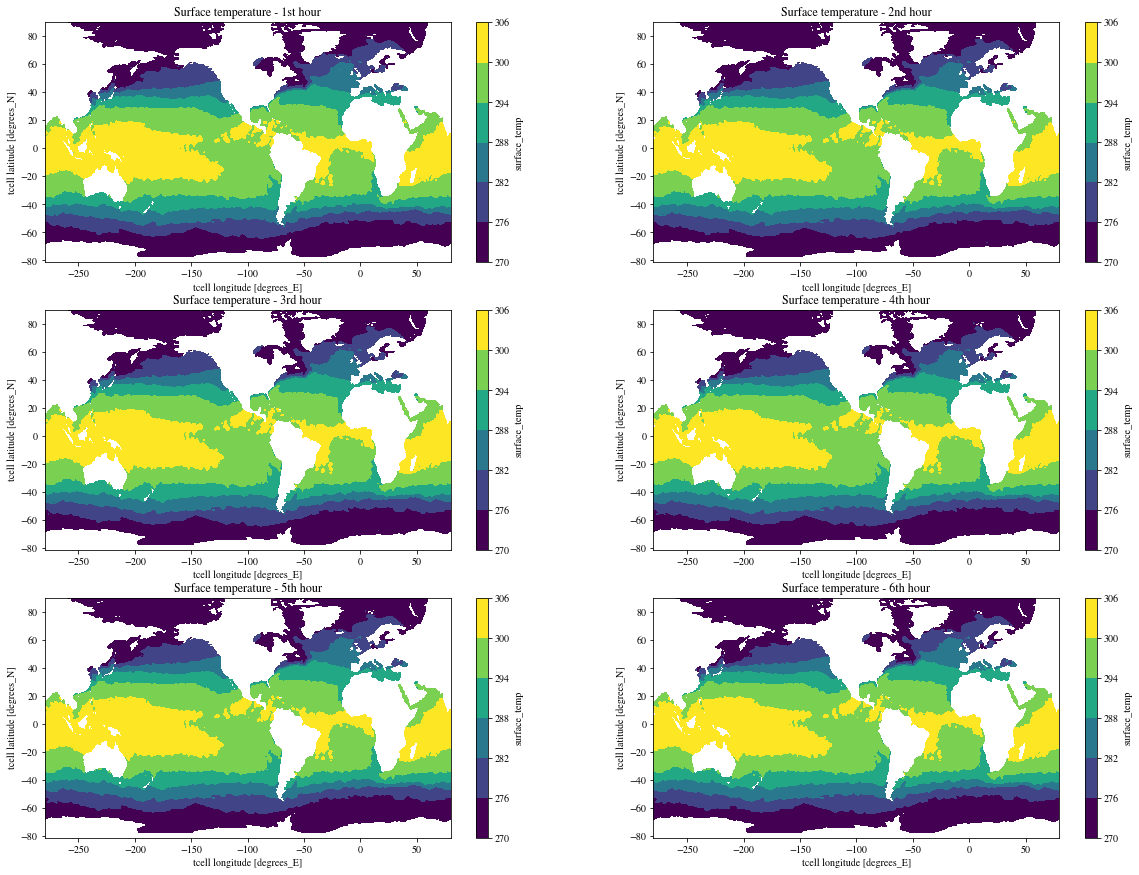

In [12]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,15))

temp_sfc.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0])
axes[0][0].set_title('Surface temperature - 1st hour')

temp_sfc.sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[0][1])
axes[0][1].set_title('Surface temperature - 2nd hour')

temp_sfc.sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[1][0])
axes[1][0].set_title('Surface temperature - 3rd hour')

temp_sfc.sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[1][1])
axes[1][1].set_title('Surface temperature - 4th hour')

temp_sfc.sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[2][0])
axes[2][0].set_title('Surface temperature - 5th hour')

temp_sfc.sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[2][1])
axes[2][1].set_title('Surface temperature - 6th hour')

Text(0.5, 1.0, 'Surface salt - 6th hour')

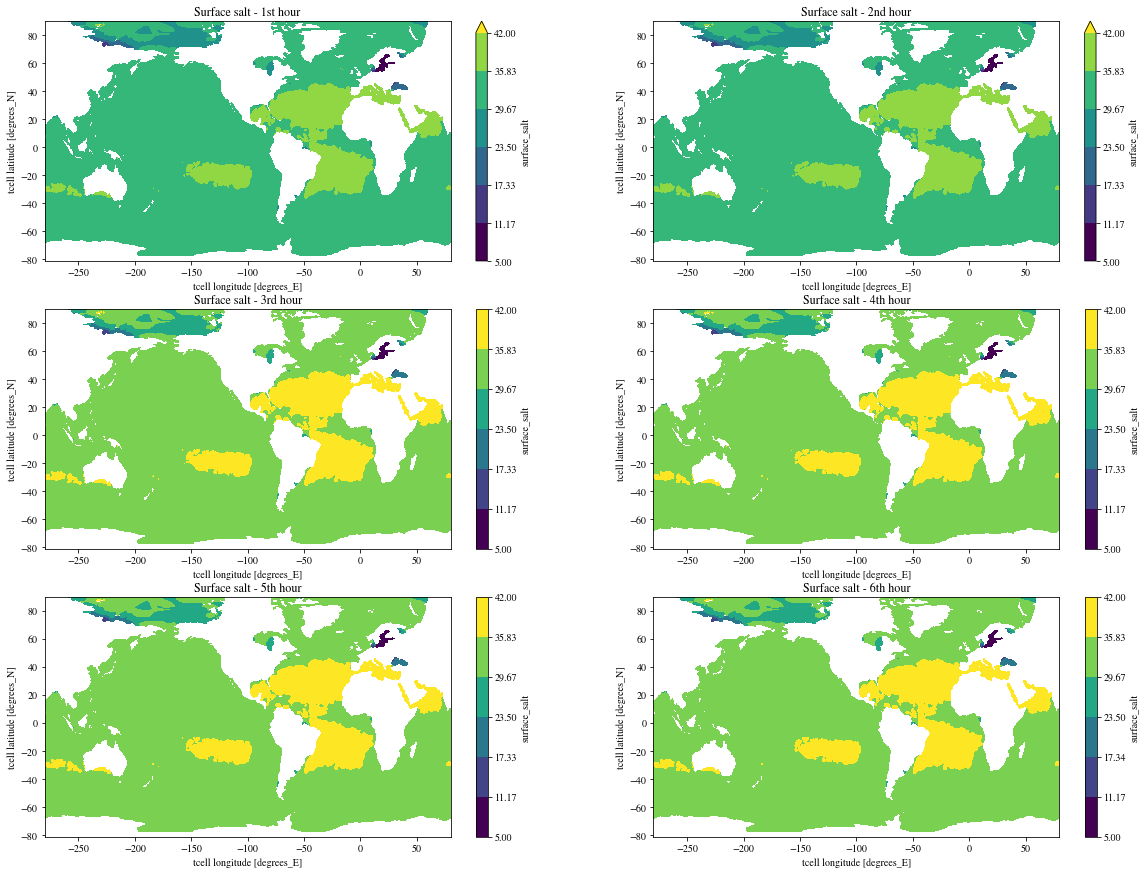

In [25]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,15))

salt_sfc.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],vmax = 42)
axes[0][0].set_title('Surface salt - 1st hour')

salt_sfc.sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[0][1],vmax = 42)
axes[0][1].set_title('Surface salt - 2nd hour')

salt_sfc.sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[1][0],vmax = 42)
axes[1][0].set_title('Surface salt - 3rd hour')

salt_sfc.sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[1][1],vmax = 42)
axes[1][1].set_title('Surface salt - 4th hour')

salt_sfc.sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[2][0],vmax = 42)
axes[2][0].set_title('Surface salt - 5th hour')

salt_sfc.sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[2][1],vmax = 42)
axes[2][1].set_title('Surface salt - 6th hour')

Text(0.5, 1.0, 'PME_river - 6th hour')

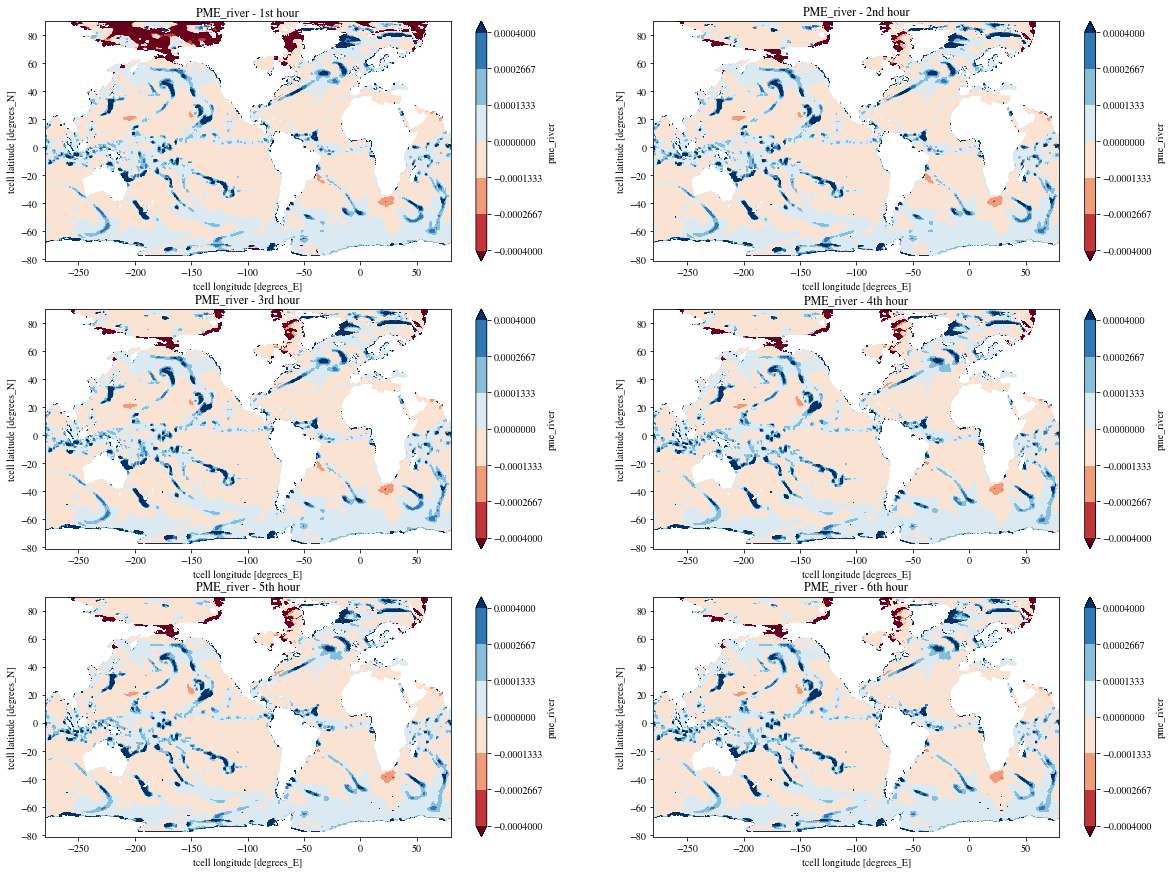

In [24]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,15))

pme_river.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],vmin = -4e-4, vmax = 4e-4,cmap = 'RdBu')
axes[0][0].set_title('PME_river - 1st hour')

pme_river.sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[0][1],vmin = -4e-4, vmax = 4e-4,cmap = 'RdBu')
axes[0][1].set_title('PME_river - 2nd hour')

pme_river.sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[1][0],vmin = -4e-4, vmax = 4e-4,cmap = 'RdBu')
axes[1][0].set_title('PME_river - 3rd hour')

pme_river.sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[1][1],vmin = -4e-4, vmax = 4e-4,cmap = 'RdBu')
axes[1][1].set_title('PME_river - 4th hour')

pme_river.sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[2][0],vmin = -4e-4, vmax = 4e-4,cmap = 'RdBu')
axes[2][0].set_title('PME_river - 5th hour')

pme_river.sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[2][1],vmin = -4e-4, vmax = 4e-4,cmap = 'RdBu')
axes[2][1].set_title('PME_river - 6th hour')

Text(0.5, 1.0, 'KPP Depth - 6th hour')

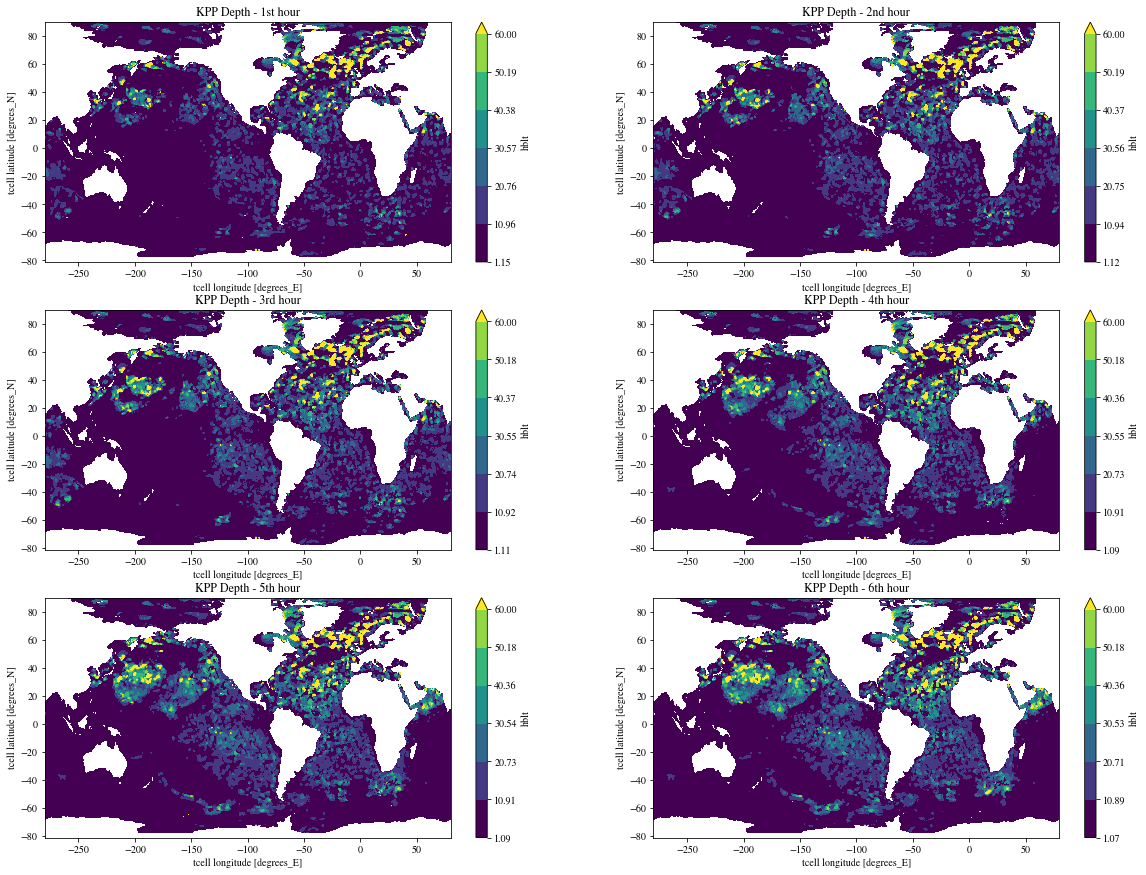

In [29]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,15))

hblt.sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0], vmax = 60)
axes[0][0].set_title('KPP Depth - 1st hour')

hblt.sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[0][1], vmax = 60)
axes[0][1].set_title('KPP Depth - 2nd hour')

hblt.sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[1][0], vmax = 60)
axes[1][0].set_title('KPP Depth - 3rd hour')

hblt.sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[1][1], vmax = 60)
axes[1][1].set_title('KPP Depth - 4th hour')

hblt.sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[2][0], vmax = 60)
axes[2][0].set_title('KPP Depth - 5th hour')

hblt.sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[2][1], vmax = 60)
axes[2][1].set_title('KPP Depth - 6th hour')

### KPP Diffusivity

In [33]:
diff_cbt = cc.querying.getvar(expt,'diff_cbt_t',session,frequency = '1 hourly')

A. Atlantic Ocean

In [40]:
area_t = cc.querying.getvar(expt=expt, variable='area_t', session=session, frequency='static', n=1).sel(
    xt_ocean = slice(-90,10)).sel(yt_ocean = slice(10,70))
diff_cbt_avg = (diff_cbt*area_t).sum(dim = ['yt_ocean','xt_ocean'])/area_t.sum(dim = ['yt_ocean','xt_ocean'])

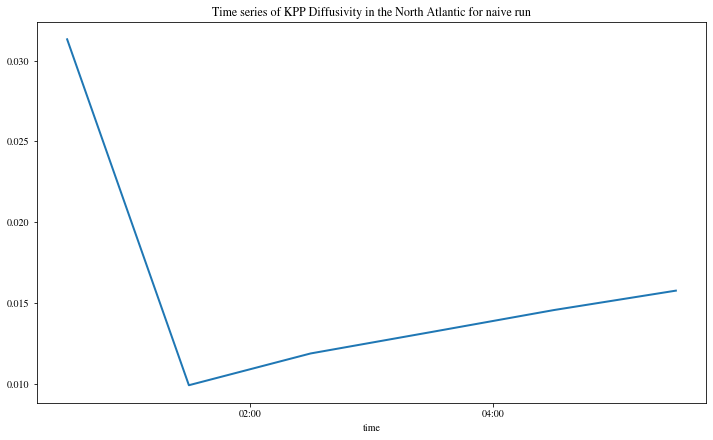

In [41]:
plt.figure(figsize = (12,7))
diff_cbt_avg.sel(st_ocean = slice(0,500)).mean('st_ocean').sel(time = slice('1900-01-01','1950-12-31')).plot()
plt.title('Time series of KPP Diffusivity in the North Atlantic for naive run')
plt.show()

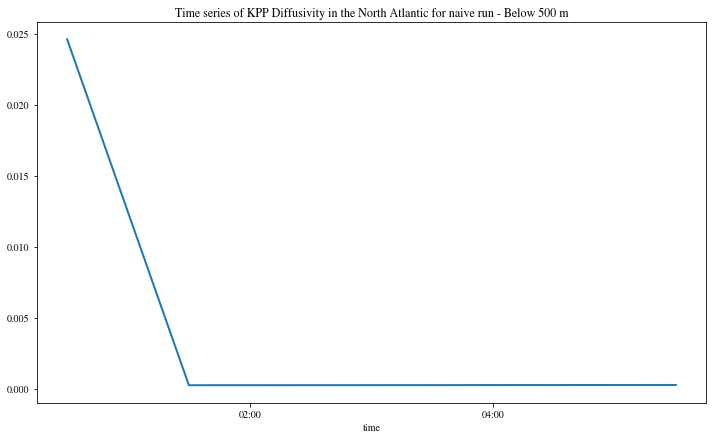

In [43]:
plt.figure(figsize = (12,7))
diff_cbt_avg.sel(st_ocean = slice(500,5000)).mean('st_ocean').sel(time = slice('1900-01-01','1950-12-31')).plot()
plt.title('Time series of KPP Diffusivity in the North Atlantic for naive run - Below 500 m')
plt.show()

B. Pacific Ocean

In [45]:
area_t = cc.querying.getvar(expt=expt, variable='area_t', session=session, frequency='static', n=1).sel(
    xt_ocean = slice(-250,-100)).sel(yt_ocean = slice(10,70))
diff_cbt_avg = (diff_cbt*area_t).sum(dim = ['yt_ocean','xt_ocean'])/area_t.sum(dim = ['yt_ocean','xt_ocean'])

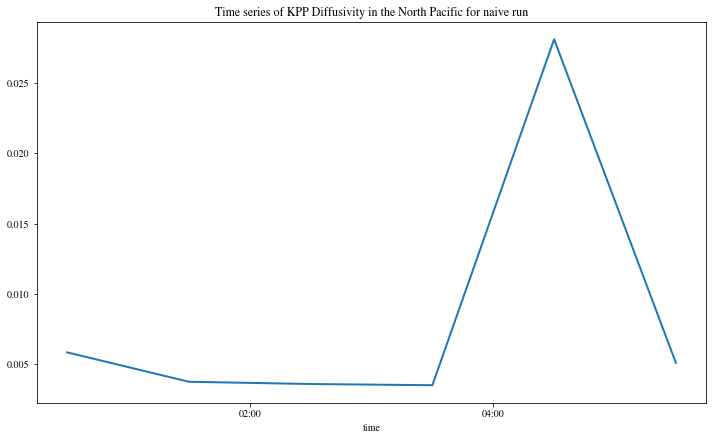

In [47]:
plt.figure(figsize = (12,7))
diff_cbt_avg.sel(st_ocean = slice(0,500)).mean('st_ocean').sel(time = slice('1900-01-01','1950-12-31')).plot()
plt.title('Time series of KPP Diffusivity in the North Pacific for naive run')
plt.show()

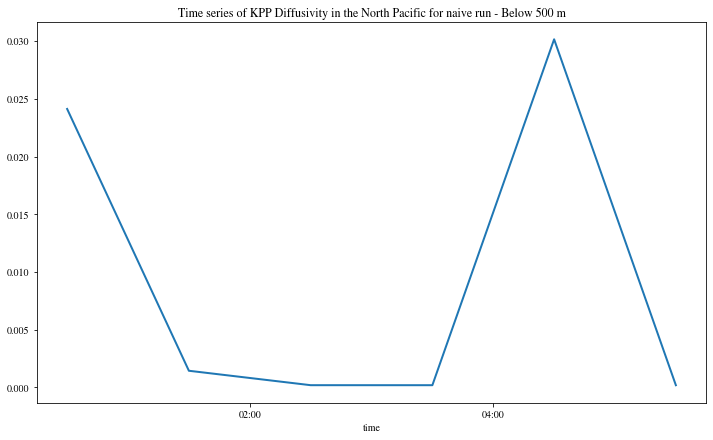

In [49]:
plt.figure(figsize = (12,7))
diff_cbt_avg.sel(st_ocean = slice(500,5000)).mean('st_ocean').sel(time = slice('1900-01-01','1950-12-31')).plot()
plt.title('Time series of KPP Diffusivity in the North Pacific for naive run - Below 500 m')
plt.show()